In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ROOT as root
from math import *

Welcome to JupyROOT 6.20/06


In [2]:

f_ttV = root.TFile.Open("output_mc16e/ttV.root","read")
f_W = root.TFile.Open("output_mc16e/Wjets.root","read")
f_Z = root.TFile.Open("output_mc16e/Zjets.root","read")
f_tt = root.TFile.Open("output_mc16e/ttbar.root","read")
f_di = root.TFile.Open("output_mc16e/diboson.root","read")
f_si = root.TFile.Open("output_mc16e/singleTop.root","read")
f_data = root.TFile.Open("output_mc16e/data.root","read")

In [3]:
def getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, pt_limit, m_limit):
    m_down = root.TLorentzVector()
    min_deltaM = 999999.0
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        temp = jet + m_cjet + m_had_b
        if (min_deltaM > fabs(m_mTop - temp.M())):
            min_deltaM = fabs(m_mTop - temp.M())
            m_down = jet
    jet_m = fabs(jet.M())
    jet_pt = fabs(jet.Pt())
    if ((m_limit > jet_m) or (pt_limit > jet_pt)):
        m_down = []
    return m_down

In [4]:
def getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit):
    m_down = root.TLorentzVector()
    min_deltaM = 999999.0
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        temp = jet + m_cjet + m_had_b
        if (min_deltaM > fabs(m_mTop - temp.M())):
            min_deltaM = fabs(m_mTop - temp.M())
            m_down = jet
    jet_m = fabs(jet.M())
    if (m_limit > jet_m):
        m_down = []
    return m_down

In [5]:
def getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, pt_limit):
    m_down = root.TLorentzVector()
    min_deltaM = 999999.0
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        temp = jet + m_cjet + m_had_b
        if (min_deltaM > fabs(m_mTop - temp.M())):
            min_deltaM = fabs(m_mTop - temp.M())
            m_down = jet
    jet_pt = fabs(jet.Pt())
    dpt = m_down.Pt()
    if (pt_limit > jet_pt):
        m_down = []
    if (dpt == 0):
        m_down = 0
    return m_down

#try cut jets on pt first

In [6]:
def getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop):
    m_down = root.TLorentzVector()
    min_deltaM = 999999.0
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        temp = jet + m_cjet + m_had_b
        if (min_deltaM > fabs(m_mTop - temp.M())):
            min_deltaM = fabs(m_mTop - temp.M())
            m_down = jet
    dpt = m_down.Pt()
    if (dpt == 0):
        m_down = 0
    return m_down

In [7]:
def getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit):
    m_down = root.TLorentzVector()
    min_deltaM = 999999.0
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        temp = jet + m_cjet + m_had_b
        if (min_deltaM > fabs(m_mTop - temp.M())):
            min_deltaM = fabs(m_mTop - temp.M())
            m_down = jet
    if (min_deltaM > m_limit) or (m_down.Pt() == 0):
        m_down = []
    return m_down

In [8]:
def getNeutrino(m_mW, m_lepton, m_met_x, m_met_y):
    
    k = ((m_mW*m_mW - m_lepton.M()*m_lepton.M()) / 2.) + (m_lepton.Px()*m_met_x + m_lepton.Py()*m_met_y)
    a = m_lepton.E()*m_lepton.E() - m_lepton.Pz()*m_lepton.Pz()
    b = -2 * k * m_lepton.Pz()
    c = m_lepton.E()*m_lepton.E()*met_met*met_met - k*k

    disc = b*b - 4*a*c
    nu_pz = 0.0
    if (disc < 0):
        nu_pz = -b/(2*a)
    else:
        nu_pz_1 = (-b + np.sqrt(disc)) / (2*a)
        nu_pz_2 = (-b - np.sqrt(disc)) / (2*a)
        
        nu_pz = nu_pz_1 if (fabs(nu_pz_1) > fabs(nu_pz_2)) else nu_pz_2

    if (nu_pz == 0.0):        
        print("Failed to reconstruct nu")

    energy = np.sqrt(m_met_x*m_met_x + m_met_y*m_met_y + nu_pz*nu_pz)
    m_neutrino = root.TLorentzVector()
    m_neutrino.SetPxPyPzE(m_met_x, m_met_y, nu_pz, energy)

    return m_neutrino;

In [9]:
def getBJets(jets, m_bjet_PCB, pcbs, m_bjets):
#    m_bjets.clear()
    for ijet in range(0, njets):
        tjet = jets[ijet]       
        if (pcbs[ijet] >= m_bjet_PCB):
            m_bjets.append(tjet)
    return m_bjets

In [10]:
def getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets):
#    m_cjets.clear()
    for ijet in range(0, njets):
        tjet = jets[ijet]
        if (pcbs[ijet] >= m_cjet_PCB and pcbs[ijet] < m_bjet_PCB):
            m_cjets.append(tjet)
    return m_cjets

In [11]:
def getLeptonicBJet(m_lepton, m_bjets):
    min_dR = 999.0
    for bjet in m_bjets:
        dR = bjet.DeltaR(m_lepton)
        if (min_dR > dR):
            min_dR = dR
            m_lep_b = bjet
    return m_lep_b

In [12]:
def getHadronicBJet(m_bjets):
    for bjet in m_bjets:
        if (m_lep_b == bjet):
            continue
        m_had_b = bjet;
        return bjet;        
    print ("ERROR: Unable to find a hadronic bjet, returning the lead jet")       
    return m_bjets[0];

In [13]:
def getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets):
    m_down = root.TLorentzVector()
    min_deltaR = 9999.0
    for jet in jets:
        deltaR = jet.DeltaR(m_cjet);
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        if (deltaR < min_deltaR):
            min_deltaR = deltaR
            m_down = jet;
    return m_down

In [14]:
def getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, eta_limit):
    m_down = root.TLorentzVector()
    min_deltaM = 999999.0
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        temp = jet + m_cjet + m_had_b
        if (min_deltaM > fabs(m_mTop - temp.M())):
            min_deltaM = fabs(m_mTop - temp.M())
            m_down = jet
    jet_eta = fabs(jet.Eta())
    if (eta_limit < jet_eta):
        m_down = []
    return m_down

In [15]:
def getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose):
    m_down = root.TLorentzVector()
    min_deltaM = 999999.0
    use_dR = False
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        deltaR = jet.DeltaR(m_cjet);
        if (deltaR < 3.0):
            use_dR = True 
            break
##    // what if we cut out events with no light jet near the cjet??
    for jet in jets:
        if (jet == m_had_b or jet == m_cjet or jet == m_lep_b):
            continue
        temp = jet + m_cjet + m_had_b
        if (min_deltaM > fabs(m_mTop - temp.M())):
            if ((use_dR and (jet.DeltaR(m_cjet) < 3.0)) or (not use_dR)):
                min_deltaM = fabs(m_mTop - temp.M())
                m_down = jet
                
    if ((m_down.DeltaR(m_cjet) > 3.0) and (verbose == 1)):
        print("Delta R =", m_down.DeltaR(m_cjet),", Delta M =", min_deltaM)

    return m_down

In [16]:
index_fail = 0
Custom_bins = np.array((0.,10000.,20000.,30000.,40000.,50000.,60000.,70000.,80000.,90000.,100000.,115000.,130000.,145000.,160000.,200000.,250000.,500000.))
N = len(Custom_bins)-1

In [17]:
tree = f_ttV.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

h_ttV = root.TH1D("ttV","down_pt",N,Custom_bins)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    #if (event.down_index >= njets):
        #continue
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
    
    m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)

    
    #m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    

    if (m_down == []):
        continue
        
    if (m_down == 0):
        index_fail += event.event_weight
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = m_down.Pt()
    
    h_ttV.Fill(down_pt, event.event_weight)

    
    



In [18]:
tree = f_W.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

h_W = root.TH1D("Wjets","down_pt",N,Custom_bins)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    #if (event.down_index >= njets):
        #continue
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
    m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    
    #m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    

    if (m_down == []):
        continue
        
    if (m_down == 0):
        index_fail += event.event_weight
        continue       

    m_hadtop = m_down + m_had_b + m_cjet
    


    m_ttbar = m_hadtop + m_leptop
    
    down_pt = m_down.Pt()
    
    h_W.Fill(down_pt, event.event_weight)

         

In [19]:
tree = f_Z.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

h_Z = root.TH1D("Z","down_pt",N,Custom_bins)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    #if (event.down_index >= njets):
        #continue
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
    m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)    
    
    #m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
   

    if (m_down == []):
        continue
        
    if (m_down == 0):
        index_fail += event.event_weight
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    
    m_ttbar = m_hadtop + m_leptop
    
    down_pt = m_down.Pt()
    
    h_Z.Fill(down_pt,event.event_weight)
    


In [20]:
tree = f_tt.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

h_tt = root.TH1D("ttbar","down_pt",N,Custom_bins)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    #if (event.down_index >= njets):
        #continue
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    
    m_had_b = getHadronicBJet(m_bjets)
    
    m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    
    #m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    


    if (m_down == []):
        continue
        
    if (m_down == 0):
        index_fail += event.event_weight
        continue
        
    index2 += 1

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = m_down.Pt()
    
    real_down_pt = event.jet_pt[event.down_index]
    
    if (real_down_pt == down_pt):
        index3 += 1
    
    h_tt.Fill(down_pt,event.event_weight)
    
print((index3/index2)*100)


    

75.3441563855058


In [21]:
tree = f_di.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

h_di = root.TH1D("diboson","down_pt",N,Custom_bins)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    #if (event.down_index >= njets):
        #continue
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
    m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    #m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    


    if (m_down == []):
        continue
        
    if (m_down == 0):
        index_fail += event.event_weight
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    


    m_ttbar = m_hadtop + m_leptop
    
    down_pt = m_down.Pt()
    
    h_di.Fill(down_pt,event.event_weight)

    

In [22]:
tree = f_si.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

h_si = root.TH1D("singleTop","down_pt",N,Custom_bins)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    #if (event.down_index >= njets):
        #continue
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop) 
   # m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    


    if (m_down == []):
        continue
    
    if (m_down == 0):
        index_fail += event.event_weight
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    


    m_ttbar = m_hadtop + m_leptop
    
    down_pt = m_down.Pt()
    
    h_si.Fill(down_pt,event.event_weight)
    
print(index_fail)



393.3466549884743


In [23]:
tree = f_data.Get("nominal")

index = 0
index2 = 0
index3 = 0
index_fail_data = 0
listing = []
masses = np.array(listing)

h_data = root.TH1D("data","down_pt",N,Custom_bins)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    #if (event.down_index >= njets):
        #continue
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
    m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop) 
    
    #m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    


    if (m_down == []):
        continue
        
    if (m_down == 0):
        index_fail_data += event.event_weight
        continue

    m_hadtop = m_down + m_had_b + m_cjet

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = m_down.Pt()
    
    h_data.Fill(down_pt,event.event_weight)
    
print(index_fail_data)



390.0


901.4155881411492
3091.9859164271897
1085.2304805672338
7742.392868554572
213.95578396147735
254862.0
219838.6018919798
232873.58252963139


Info in <TCanvas::Print>: png file downpt_no_selection_mc16e.png has been created


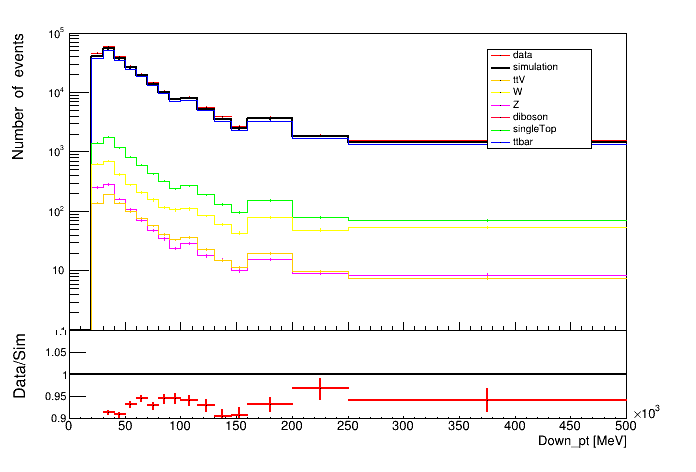

In [24]:
h_ttc = h_tt.Clone()
h_ttVc = h_ttV.Clone()
h_Wc = h_W.Clone()
h_Zc = h_Z.Clone()
h_sic = h_si.Clone()
h_dic = h_di.Clone()

h_sim = h_ttc + h_ttVc + h_Wc + h_Zc + h_sic + h_dic


c1 = root.TCanvas()
c1.Clear()
c1.SetLogy(True)



h_ttV.SetStats(0)
h_W.SetStats(0)
h_Z.SetStats(0)
h_si.SetStats(0)
h_di.SetStats(0)
h_data.SetStats(0)
h_tt.SetStats(0)
h_sim.SetStats(0)


h_tt.SetLineColor(root.kBlue)
h_data.SetLineColor(root.kRed)
h_si.SetLineColor(root.kGreen)
h_Z.SetLineColor(root.kMagenta)
h_di.SetLineColor(root.kPink)
h_W.SetLineColor(root.kYellow)
h_ttV.SetLineColor(root.kOrange)

h_sim.SetLineColor(root.kBlack)
h_sim.SetLineWidth(2)


pad1 = root.TPad("pad1","pad1" ,0,0.3,1,1)
pad1.SetLogy(True)
pad1.SetBottomMargin (0)
pad1.Draw()
pad1.cd()

h_data.Draw("pe")
h_sim.Draw("h,same")
h_tt.Draw("h,same")
h_si.Draw("h,same")
h_Z.Draw("h,same")
h_W.Draw("h,same")
h_ttV.Draw("h,same")

h_data.SetTitle("")
h_data.GetYaxis (). SetTitleSize (0.05)
h_data.GetYaxis().SetRangeUser (1 ,100000)
h_data.GetXaxis().SetLabelSize (0)
h_data.GetXaxis().SetTitleSize (0)
h_data.GetYaxis().SetTitle("Number  of  events")

print(h_ttV.Integral())
print(h_W.Integral())
print(h_Z.Integral())
print(h_si.Integral())
print(h_di.Integral())
print(h_data.Integral())
print(h_tt.Integral())
print(h_sim.Integral())


legend = root.TLegend(.7,.55,.85,.85)
legend.AddEntry(h_data,"data");
legend.AddEntry(h_sim,"simulation");
legend.AddEntry(h_ttV,"ttV");
legend.AddEntry(h_W,"W");
legend.AddEntry(h_Z,"Z");
legend.AddEntry(h_di,"diboson");
legend.AddEntry(h_si,"singleTop");
legend.AddEntry(h_tt,"ttbar");

legend.Draw()


ratio = h_sim.Clone()
ratio.Divide(h_data)
ratio.SetLineColor(root.kRed)

c1.cd()
pad2 = root.TPad("pad2","pad2" ,0,0.05,1,0.3)
pad2.SetTopMargin(0)
pad2.SetBottomMargin(0.25)
pad2.Draw()
pad2.cd()
ratio.Draw("pe")
ratio.GetYaxis().SetRangeUser (0.9 ,1.1)
ratio.GetYaxis().SetNdivisions(207)
ratio.SetTitle("")
ratio.GetXaxis (). SetLabelSize (0.12)
ratio.GetXaxis (). SetTitleSize (0.12)
ratio.GetYaxis (). SetLabelSize (0.1)
ratio.GetYaxis (). SetTitleSize (0.15)
ratio.GetYaxis (). SetTitle("Data/Sim")
ratio.GetYaxis (). SetTitleOffset (0.3)
ratio.GetXaxis().SetTitle("Down_pt [MeV]")

line = root.TLine (1.e3 ,1 ,500.e3 ,1)
line.SetLineColor(root.kBlack)
line.SetLineWidth (2)
line.Draw("same")

#rp = root.TRatioPlot(histoadata, histoprune4)
#histoprune4.SetTitle("")

#rp.Draw()

c1.Draw()
c1.Print("downpt_no_selection_mc16e.png")

In [26]:
f_ttV.Close()
f_W.Close()
f_Z.Close()
f_tt.Close()
f_di.Close()
f_si.Close()
f_data.Close()


In [ ]:
print(h_ttV.Integral())
print(h_W.Integral())
print(h_Z.Integral())
print(h_si.Integral())
print(h_di.Integral())
print(h_data.Integral())
print(h_tt.Integral())
print(h_sim.Integral())

In [ ]:
d6 = root.TFile.Open("output_mc16d/ttV.root","read")
d2 = root.TFile.Open("output_mc16d/Wjets.root","read")
d3 = root.TFile.Open("output_mc16d/Zjets.root","read")
ddata = root.TFile.Open("output_mc16d/data.root","read")
d4 = root.TFile.Open("output_mc16d/diboson.root","read")
d5 = root.TFile.Open("output_mc16d/singleTop.root","read")
d1 = root.TFile.Open("output_mc16d/ttbar.root","read")

In [ ]:
tree = ddata.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

histoddata = root.TH1D("data","down_pt",10,0, 500000)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    #m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    
    #m_down = getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 7*GeV)
    
    #m_down = getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV, 6*GeV)
    
    #m_down = getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 1.5)
    
    #m_down = getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit)
    
    #m_down = getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose)
    
    #m_down = getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets)

    if (m_down == []):
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = event.jet_pt[event.down_index]
    down_m = event.jet_m[event.down_index]
    down_eta = event.jet_eta[event.down_index]
    down_phi = event.jet_phi[event.down_index]
    
    histoddata.Fill(down_pt,event.event_weight)
    

In [ ]:
tree = d1.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

histod1 = root.TH1D("ttbar","down_pt",10,0, 500000)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    #m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    
    #m_down = getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 7*GeV)
    
    #m_down = getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV, 6*GeV)
    
    #m_down = getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 1.5)
    
    #m_down = getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit)
    
    #m_down = getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose)
    
    #m_down = getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets)

    if (m_down == []):
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = event.jet_pt[event.down_index]
    down_m = event.jet_m[event.down_index]
    down_eta = event.jet_eta[event.down_index]
    down_phi = event.jet_phi[event.down_index]
    
    histod1.Fill(down_pt,event.event_weight)

In [46]:
tree = d2.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

histod2 = root.TH1D("Wjets","down_pt",10,0, 500000)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    #m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    
    #m_down = getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 7*GeV)
    
    #m_down = getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV, 6*GeV)
    
    #m_down = getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 1.5)
    
    #m_down = getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit)
    
    #m_down = getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose)
    
    #m_down = getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets)

    if (m_down == []):
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = event.jet_pt[event.down_index]
    down_m = event.jet_m[event.down_index]
    down_eta = event.jet_eta[event.down_index]
    down_phi = event.jet_phi[event.down_index]
    
    histod2.Fill(down_pt,event.event_weight)

Warning in <TFile::Append>: Replacing existing TH1: Wjets (Potential memory leak).


In [47]:
tree = d3.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

histod3 = root.TH1D("Zjets","down_pt",10,0, 500000)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    #m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    
    #m_down = getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 7*GeV)
    
    #m_down = getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV, 6*GeV)
    
    #m_down = getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 1.5)
    
    #m_down = getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit)
    
    #m_down = getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose)
    
    #m_down = getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets)

    if (m_down == []):
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = event.jet_pt[event.down_index]
    down_m = event.jet_m[event.down_index]
    down_eta = event.jet_eta[event.down_index]
    down_phi = event.jet_phi[event.down_index]
    
    histod3.Fill(down_pt,event.event_weight)

Warning in <TFile::Append>: Replacing existing TH1: Zjets (Potential memory leak).


In [48]:
tree = d4.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

histod4 = root.TH1D("diboson","down_pt",10,0, 500000)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    #m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    
    #m_down = getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 7*GeV)
    
    #m_down = getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV, 6*GeV)
    
    #m_down = getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 1.5)
    
    #m_down = getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit)
    
    #m_down = getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose)
    
    #m_down = getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets)

    if (m_down == []):
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = event.jet_pt[event.down_index]
    down_m = event.jet_m[event.down_index]
    down_eta = event.jet_eta[event.down_index]
    down_phi = event.jet_phi[event.down_index]
    
    histod4.Fill(down_pt,event.event_weight)

Warning in <TFile::Append>: Replacing existing TH1: diboson (Potential memory leak).


In [49]:
tree = d5.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

histod5 = root.TH1D("singleTop","down_pt",10,0, 500000)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    #m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    
    #m_down = getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 7*GeV)
    
    #m_down = getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV, 6*GeV)
    
    #m_down = getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 1.5)
    
    #m_down = getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit)
    
    #m_down = getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose)
    
    #m_down = getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets)

    if (m_down == []):
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = event.jet_pt[event.down_index]
    down_m = event.jet_m[event.down_index]
    down_eta = event.jet_eta[event.down_index]
    down_phi = event.jet_phi[event.down_index]
    
    histod5.Fill(down_pt,event.event_weight)

Warning in <TFile::Append>: Replacing existing TH1: singleTop (Potential memory leak).


In [50]:
tree = d6.Get("nominal")

index = 0
index2 = 0
index3 = 0
listing = []
masses = np.array(listing)

histod6 = root.TH1D("ttV","down_pt",10,0, 500000)

for event in tree: # loop around all the events in the file

    njets = event.jet_pt.size() # check how many jets are in the event
    
    index += 1
    
    verbose = 0
    
    m_bjet_PCB = 4   
    m_cjet_PCB = 1

    jets = []   
    pcbs = []    
    m_bjets = []
    m_cjets = []
    jet_truth_matches = []
    
    GeV = 1000
    
    m_limit = 100*GeV
    
    m_mW = 80.4*GeV   
    m_mTop = 172.5*GeV
    
    met_met = event.met_met
    met_phi = event.met_phi
    m_met_x = met_met*np.cos(met_phi)
    m_met_y = met_met*np.sin(met_phi)

    for ijet in range(0, njets): # loop around the jets in the event

        temp_jet = root.TLorentzVector()

        temp_jet.SetPtEtaPhiM(event.jet_pt[ijet], event.jet_eta[ijet], event.jet_phi[ijet], event.jet_m[ijet]) # read the jet info into a TLorentzVector

        jets.append(temp_jet)
        
        t_pcb = event.jet_pcb[ijet]
        
        pcbs.append(t_pcb)
        
        t_truth = event.jet_truth_match[ijet]
        
        jet_truth_matches.append(t_truth)
        
    m_lepton = root.TLorentzVector()           
    m_lepton.SetPtEtaPhiM(event.lep_pt[0], event.lep_eta[0], event.lep_phi[0], event.lep_m[0])
    
    m_bjets = getBJets(jets, m_bjet_PCB, pcbs, m_bjets)
    
    m_lep_b = getLeptonicBJet(m_lepton, m_bjets)
    
    m_neutrino = getNeutrino(m_mW, m_lepton, m_met_x, m_met_y)
    
    m_leptop = m_lepton + m_lep_b + m_neutrino
    
    m_cjets = getCJets(m_cjet_PCB, m_bjet_PCB, jets, pcbs, m_cjets)
    
    if (m_cjets == []):
        continue
    
    m_cjet = m_cjets[0]
    
    index2 += 1
    
    m_had_b = getHadronicBJet(m_bjets)
    
 
    #m_down = getDownTypeJet_massWindow(m_had_b, m_cjet, m_lep_b, jets, m_mTop)
    
    m_down = getDownTypeJet_massWindow_pt(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV)
    
    #m_down = getDownTypeJet_massWindow_m(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 7*GeV)
    
    #m_down = getDownTypeJet_massWindow_mixed(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 35*GeV, 6*GeV)
    
    #m_down = getDownTypeJet_massWindow_eta(m_had_b, m_cjet, m_lep_b, jets, m_mTop, 1.5)
    
    #m_down = getDownTypeJet_massWindow_Limit(m_had_b, m_cjet, m_lep_b, jets, m_mTop, m_limit)
    
    #m_down = getDownTypeJet_massWindowdRHybrid(m_had_b, m_cjet, m_lep_b, jets, m_mTop, verbose)
    
    #m_down = getDownTypeJet_deltaR(m_had_b, m_cjet, m_lep_b, jets)

    if (m_down == []):
        continue

    m_hadtop = m_down + m_had_b + m_cjet
    

    m_ttbar = m_hadtop + m_leptop
    
    down_pt = event.jet_pt[event.down_index]
    down_m = event.jet_m[event.down_index]
    down_eta = event.jet_eta[event.down_index]
    down_phi = event.jet_phi[event.down_index]
    
    histod6.Fill(down_pt,event.event_weight)

Warning in <TFile::Append>: Replacing existing TH1: ttV (Potential memory leak).


Warning in <TFile::Append>: Replacing existing TH1: ttdsim (Potential memory leak).


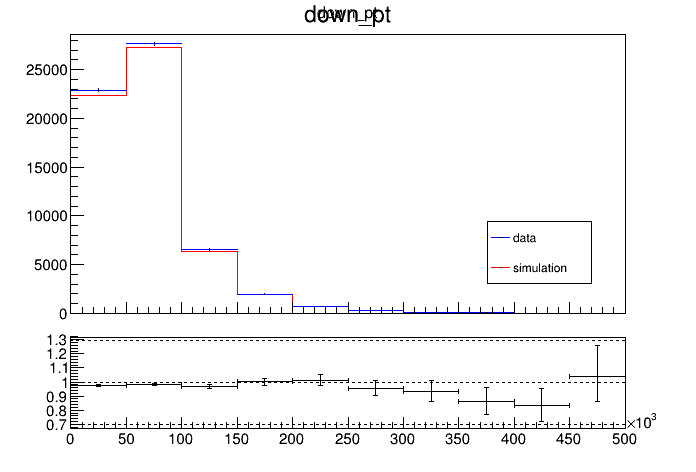

In [55]:
histodsim = root.TH1D("ttdsim","down_pt",10,0, 500000)

histodsim.Add(histodsim,histod1,1.0)
histodsim.Add(histodsim,histod2,1.0)
histodsim.Add(histodsim,histod3,1.0)
histodsim.Add(histodsim,histod4,1.0)
histodsim.Add(histodsim,histod5,1.0)
histodsim.Add(histodsim,histod6,1.0)

can2 = root.TCanvas()

histodsim.SetStats(0)
histoddata.SetStats(0)



histoddata.SetLineColor(root.kBlue)
histodsim.SetLineColor(root.kRed)


histoddata.Draw("h")
histodsim.Draw("h,same")

rp = root.TRatioPlot(histodsim, histoddata)


legend = root.TLegend(.7,.4,.85,.53)
legend.AddEntry(histoddata,"data");
legend.AddEntry(histodsim,"simulation");

rp.Draw()
legend.Draw()
can2.Draw()


XSEC2 Set, BPCB = 4

CPCB = 1
hybrid: 66.32055538648977%
mass_window: 66.32819504839269%
deltaR: 63.30211774505674%
No. of events: 6424
Events with cjet identified: 6424
    
CPCB = 2
hybrid: 70.28456795791195%
mass_window: 71.37027331151855%
DeltaR: 66.15431584513203%
No. of events: 6424
Events with cjet identified: 2703

CPCB = 3
hybrid: 67.51952112353689%
mass_window: 68.47616055708853%
DeltaR: 67.36012636234292%
No. of events: 6424
Events with cjet identified: 1085 


Mass limit = 100 GeV
CPCB = 1
mass_window: 68.13759289882306%
No. of events included: 5314
Total no. of events: 6424
% included: 82.72104607721046%

Mass limit = 80 GeV
CPCB = 1
mass_window: 68.13884111408478%
No. of events included: 5041
Total no. of events: 6424
% included: 78.47135740971358%

Mass limit = 60 GeV
CPCB = 1
mass_window: 68.13613125375183%
No. of events included: 4659
Total no. of events: 6424
% included: 72.52490660024907%

Mass limit = 40 GeV
CPCB = 1
mass_window: 68.13759289882306%
No. of events included: 3915
Total no. of events: 6424
% included: 60.94333748443338%

Mass limit = 20 GeV
CPCB = 1
mass_window: 68.98413347332114%
No. of events included: 2653
Total no. of events: 6424
% included: 41.29825653798257%



eta < 2.0
CPCB = 1
acc: 66.57169071628897%
events included: 5676 (88.35616438356165%)

eta < 1.0
CPCB = 1
acc: 65.15442218024263%
events included: 3311 (51.54109589041096%)

eta < 1.5
CPCB = 1
acc: 66.44551847169514%
events included: 4681 (72.86737235367372%)


Pt > 45 GeV
CPCB = 1
acc: 77.76989397624551%
events: 776 (12.079701120797012%)

Pt > 40 GeV
CPCB = 1
acc: 76.96073485849813%
events included: 1292 (20.1120797011208%)

Pt > 36 GeV
CPCB = 1
acc: 75.39454331925187%
events: 1996 (31.07098381070984%)

Pt > 35 GeV
CPCB = 1
acc: 75.02344341849667%
events: 2208 (34.37110834371108%)

Pt > 30 GeV
CPCB = 1
acc: 70.96038474852946%
events: 3695 (57.5186799501868%)


m > 5 GeV
CPCB = 1
acc: 67.37451358839421%
events included: 3809 (59.29327521793275%)

m > 6 GeV
CPCB = 1
acc: 70.08243903552057%
events included: 2185 (34.01307596513076%)

m > 7 GeV
CPCB = 1
acc: 73.16790675405412%
events included: 1037 (16.142590286425904%)


m > 6 GeV, Pt > 36 GeV
CPCB = 1
acc: 75.31762150431832%
events included: 1269 (19.754047322540476%)

m > 6 GeV, Pt > 35 GeV
CPCB = 1
acc: 74.70238572006315%
events included: 1346 (20.952677459526775%)





 
Full Stats Set, BPCB = 4 

CPCB = 3
mass_window: 68.00287521162186%
No. of events considered: 4428588
Events with cjet identified: 752442
    
CPCB = 2
mass_window: 68.75378642341774%
No. of events considered: 4428588
Events with cjet identified: 1909762
    
CPCB = 1
mass_window: 65.38909861795725%
No. of events considered: 4428588
Events with cjet identified: 4428588



Pt > 40 GeV
CPCB = 1
acc: 76.92150402909336%
events: 904378 (20.42136229425722%)

Pt > 45 GeV
CPCB = 1
acc: 78.73887580145058%
events: 556265 (12.560775579033317%)




In [20]:
m_down

<ROOT.TLorentzVector object ("TLorentzVector") at 0x6b37580>

In [55]:
histogram4 = masses

In [ ]:
ranges = np.linspace(0.0,500000.0,num=50)
plt.hist(histogram1,bins=ranges,label = 'Full')
plt.hist(histogram4,bins=ranges, label = '100 GeV Window')
plt.hist(histogram3,bins=ranges, label = '60 GeV Window')
plt.hist(histogram2,bins=ranges, label = '20 GeV Window')
plt.legend()
plt.show()

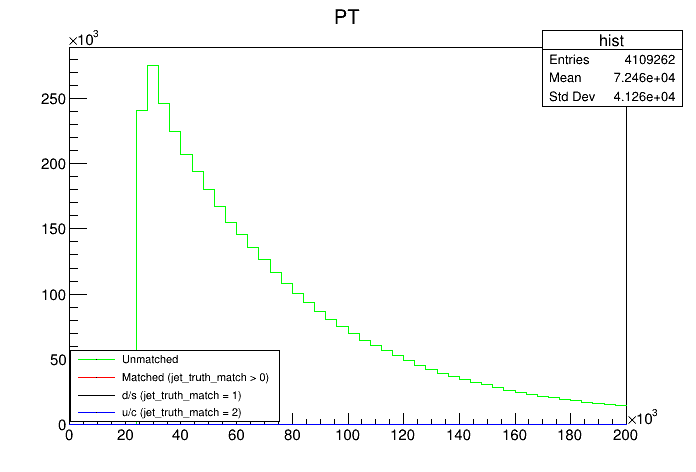

In [21]:
c1 = root.TCanvas()
hist = root.TH1D("hist","PT",50,0, 200000)
hist2 = root.TH1D("hist2","PT",50,0,200000)
hist3 = root.TH1D("hist3","PT",50,0,200000)
hist4 = root.TH1D("hist4","PT",50,0,200000)

hist.SetLineColor(root.kGreen)
hist2.SetLineColor(root.kRed)
hist3.SetLineColor(root.kBlack)
hist4.SetLineColor(root.kBlue)

legend = root.TLegend()
legend.AddEntry(hist,"Unmatched");
legend.AddEntry(hist2,"Matched (jet_truth_match > 0)");
legend.AddEntry(hist3,"d/s (jet_truth_match = 1)");
legend.AddEntry(hist4,"u/c (jet_truth_match = 2)");


tree.Draw("jet_pt >> hist","jet_truth_match==0","")
tree.Draw("jet_pt >> hist2","jet_truth_match != 0","SAME")
tree.Draw("jet_pt >> hist3","jet_truth_match==1","SAME")
tree.Draw("jet_pt >> hist4","jet_truth_match==2","SAME")
legend.Draw()
c1.Draw()

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist4 (Potential memory leak).


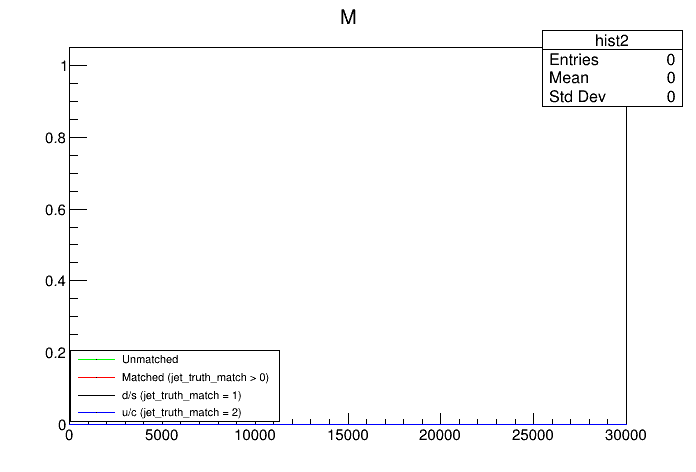

In [22]:
c1 = root.TCanvas()
hist = root.TH1D("hist","M",50,0, 30000)
hist2 = root.TH1D("hist2","M",50,0,30000)
hist3 = root.TH1D("hist3","M",50,0,30000)
hist4 = root.TH1D("hist4","M",50,0,30000)

hist.SetLineColor(root.kGreen)
hist2.SetLineColor(root.kRed)
hist3.SetLineColor(root.kBlack)
hist4.SetLineColor(root.kBlue)

legend = root.TLegend()
legend.AddEntry(hist,"Unmatched");
legend.AddEntry(hist2,"Matched (jet_truth_match > 0)");
legend.AddEntry(hist3,"d/s (jet_truth_match = 1)");
legend.AddEntry(hist4,"u/c (jet_truth_match = 2)");

tree.Draw("jet_m >> hist2","jet_truth_match != 0","")
tree.Draw("jet_m >> hist","jet_truth_match==0","SAME")
tree.Draw("jet_m >> hist3","jet_truth_match==1","SAME")
tree.Draw("jet_m >> hist4","jet_truth_match==2","SAME")
legend.Draw()
c1.Draw()

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist4 (Potential memory leak).


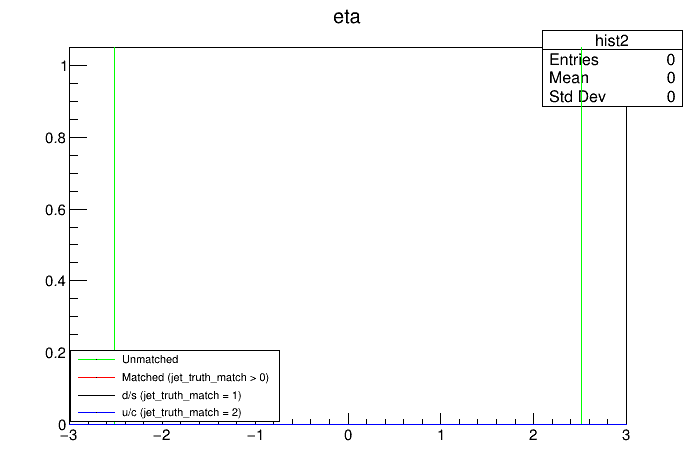

In [23]:
c1 = root.TCanvas()
hist = root.TH1D("hist","eta",50,-3,3)
hist2 = root.TH1D("hist2","eta",50,-3,3)
hist3 = root.TH1D("hist3","eta",50,-3,3)
hist4 = root.TH1D("hist4","eta",50,-3,3)

hist.SetLineColor(root.kGreen)
hist2.SetLineColor(root.kRed)
hist3.SetLineColor(root.kBlack)
hist4.SetLineColor(root.kBlue)

legend = root.TLegend()
legend.AddEntry(hist,"Unmatched");
legend.AddEntry(hist2,"Matched (jet_truth_match > 0)");
legend.AddEntry(hist3,"d/s (jet_truth_match = 1)");
legend.AddEntry(hist4,"u/c (jet_truth_match = 2)");


tree.Draw("jet_eta >> hist2","jet_truth_match != 0","")
tree.Draw("jet_eta >> hist","jet_truth_match==0","SAME")
tree.Draw("jet_eta >> hist3","jet_truth_match==1","SAME")
tree.Draw("jet_eta >> hist4","jet_truth_match==2","SAME")
legend.Draw()
c1.Draw()

Warning in <TFile::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist2 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist3 (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: hist4 (Potential memory leak).


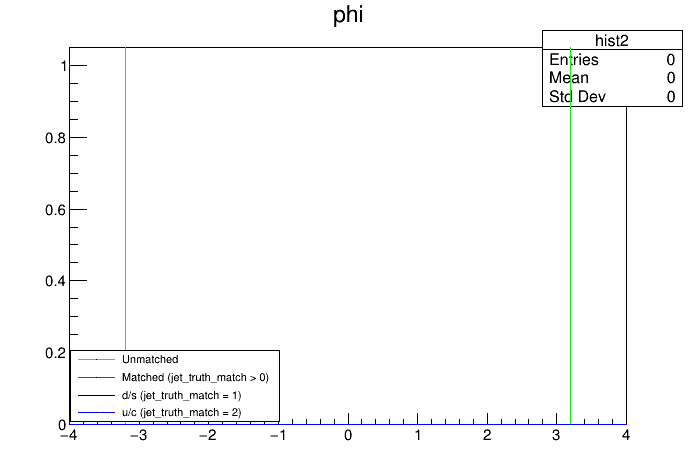

In [24]:
c1 = root.TCanvas()
hist = root.TH1D("hist","phi",50,-4,4)
hist2 = root.TH1D("hist2","phi",50,-4,4)
hist3 = root.TH1D("hist3","phi",50,-4,4)
hist4 = root.TH1D("hist4","phi",50,-4,4)

hist.SetLineColor(root.kGreen)
hist2.SetLineColor(root.kRed)
hist3.SetLineColor(root.kBlack)
hist4.SetLineColor(root.kBlue)

legend = root.TLegend()
legend.AddEntry(hist,"Unmatched");
legend.AddEntry(hist2,"Matched (jet_truth_match > 0)");
legend.AddEntry(hist3,"d/s (jet_truth_match = 1)");
legend.AddEntry(hist4,"u/c (jet_truth_match = 2)");

tree.Draw("jet_phi >> hist2","jet_truth_match != 0","")
tree.Draw("jet_phi >> hist","jet_truth_match==0","SAME")
tree.Draw("jet_phi >> hist3","jet_truth_match==1","SAME")
tree.Draw("jet_phi >> hist4","jet_truth_match==2","SAME")
legend.Draw()
c1.Draw()